<a href="https://colab.research.google.com/github/DiegoPincheiraIb/Experiencias_EL5206/blob/master/Experiencia_2/Experiencia_2_EL5206.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuraciones Preliminares

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color
from skimage import io
import os

## Cargar datos a colab:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ojos_gal.rar to ojos_gal.rar
Saving ojos_impostor.rar to ojos_impostor.rar
Saving ojos_test.rar to ojos_test.rar


In [ ]:
!unrar x ojos_gal.rar
!unrar x ojos_impostor.rar
!unrar x ojos_test.rar

In [ ]:
!ls

ojos_gal      ojos_impostor	 ojos_test	sample_data
ojos_gal.rar  ojos_impostor.rar  ojos_test.rar


In [ ]:
Str_Gal = 'ojos_gal/'
Str_Impostor = 'ojos_impostor/ojos_impostor/'
Str_Test = 'ojos_test/'
Listado_Gal = os.listdir(Str_Gal)
Listado_Impostor = os.listdir(Str_Impostor)
Listado_Test = os.listdir(Str_Test)

## Función para convertir a escala de grises:

In [ ]:
Listado_Gal_Gris = []
for imagen in Listado_Gal:
  Listado_Gal_Gris.append(color.rgb2gray(io.imread(Str_Gal + imagen)))

Listado_Impostor_Gris = []
for imagen in Listado_Impostor:
  Listado_Impostor_Gris.append(color.rgb2gray(io.imread(Str_Impostor + imagen)))

Listado_Test_Gris = []
for imagen in Listado_Test:
  Listado_Test_Gris.append(color.rgb2gray(io.imread(Str_Test + imagen)))

# Algoritmo LBP

In [ ]:
def LBP(ImagenGris_Matriz):
  Matriz_Final_Copia = np.copy(ImagenGris_Matriz)
  Mascara_Valores = np.array([[128., 64., 32.],
                  [1., 0., 1.],
                  [2., 4., 8.]])
  for row in range(1,len(ImagenGris_Matriz)-1):
    for column in range(1,len(ImagenGris_Matriz[0])-1):
      mask = np.zeros((3,3))
      mask[1,1] = ImagenGris_Matriz[row,column]
      for fila in range(-1,2):
        for columna in range(-1,2):
          if fila != 0 and columna !=0:                      
            if ImagenGris_Matriz[row+fila,column+columna] > mask[1,1]:
              mask[fila, columna] = 1
            else:
              mask[fila, columna] = 0
      Numero_Entero = np.sum(mask * Mascara_Valores)
      Matriz_Final_Copia[row, column] = Numero_Entero

  Matriz_Final_Copia_Copia = np.delete(Matriz_Final_Copia, -1, 0) # Elimina la última fila
  Matriz_Final_Copia = np.delete(Matriz_Final_Copia_Copia, -1, 1) # Elimina la última columna
  Matriz_Final_Copia_Copia = np.delete(Matriz_Final_Copia, 0, 0) # Elimina la primera fila
  Matriz_Final_Copia = np.delete(Matriz_Final_Copia_Copia, 0, 1) # Elimina la primera columna
  return Matriz_Final_Copia
  
def Imagen_Plot(Matriz_Obj):
  plt.imshow(Matriz_Obj, cmap='gray')
  plt.show()

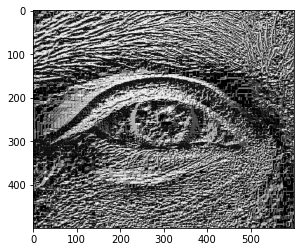

In [ ]:
Prueba = Listado_Gal_Gris[1]
Matriz_LBP = LBP(Prueba)
Imagen_Plot(Matriz_LBP)

In [ ]:
print(len(Matriz_LBP[0]))
print(500//30)

600
16


# Extracción de vectores de características:

In [ ]:
np.histogram(a, bins=59, range=None, normed=None, weights=None, density=None)[source]